## Excercise - 1 - Linear regression with one variable

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

### Plotting the data

In [2]:
import os;
path = os.getcwd() + '/data/ex1data1.txt';
data = pd.read_csv(path, header=None, names=['Population', 'Profit']);
data.head(n=5) # List first 5 rows from the dataset

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe() # describe the dataset properties

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


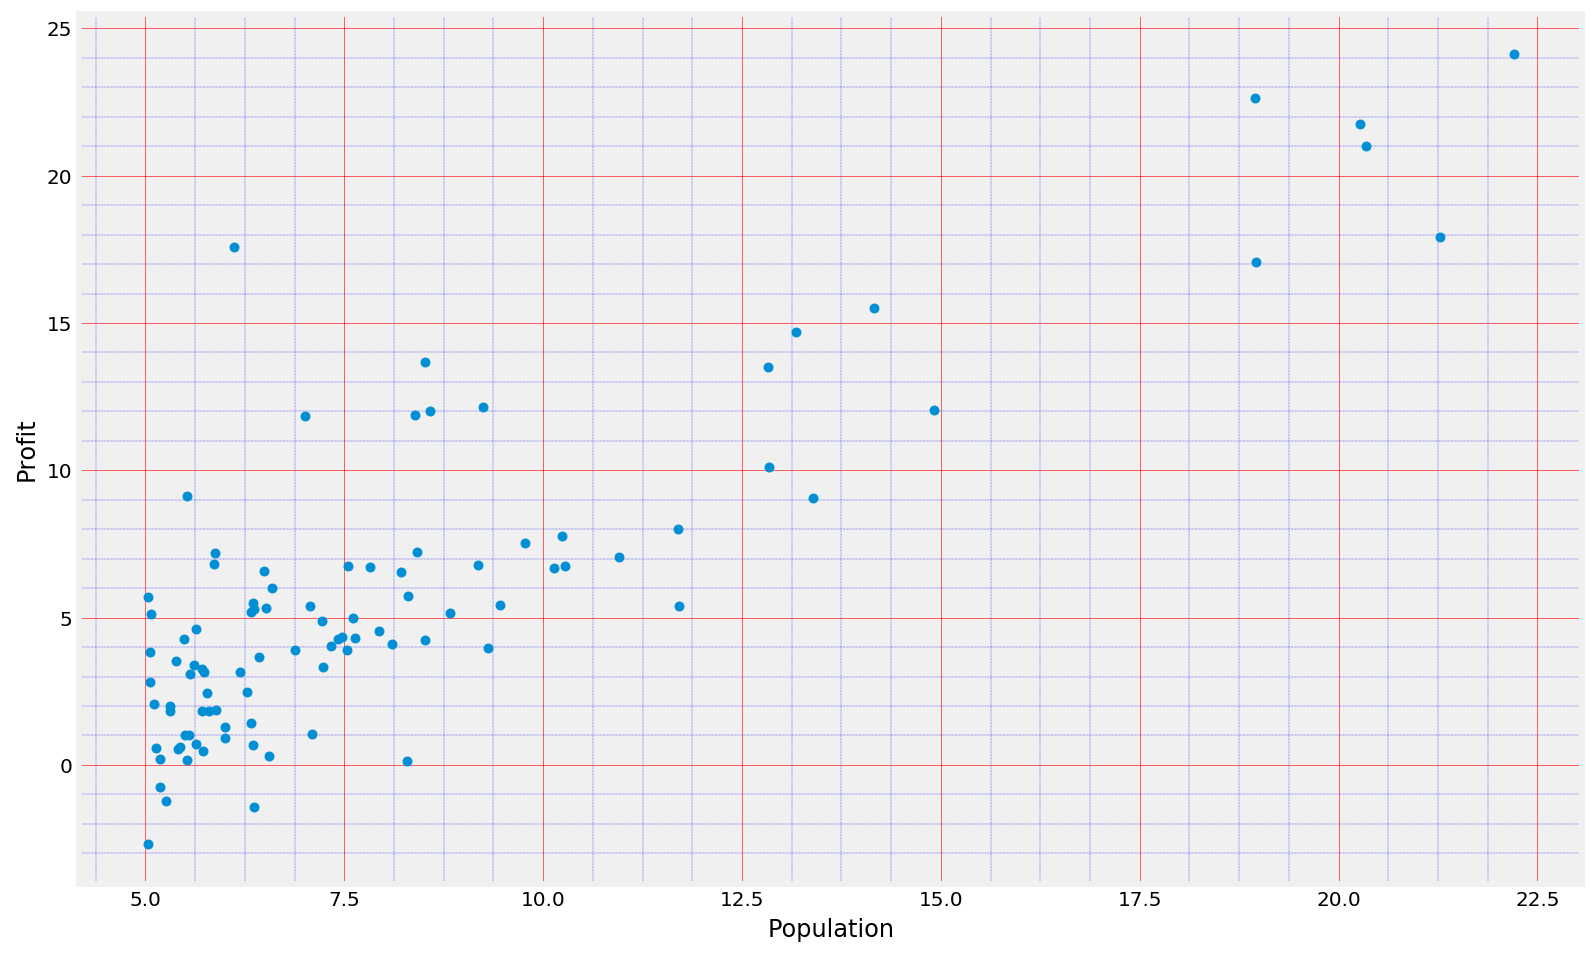

In [4]:
ax = data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
# ax.xaxis.grid(True, linestyle='-', linewidth=0.25)
# ax.yaxis.grid(True, linestyle='-', linewidth=0.25)
# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html
ls = (0, (3, 1, 1, 1, 1, 1))

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
# Turn off the display of all ticks.
ax.tick_params(which='both') # turn off bottom ticks

### Gradient Descent

In [5]:
data.insert(0, 'Ones', 1)

In [6]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
cols = data.shape[1]; # read only no. of columns
X = data.iloc[:,0:cols-1];
y = data.iloc[:, cols-1:cols];

In [8]:
def computeCost(X, y, theta):
    m = len(X);
    h = X * theta.T; # (4 X 2) * (2 X 1)
    squ_Err = np.power((h - y), 2);
    sumSq_Err = np.sum(squ_Err);
    J = (1/(2 * m)) * sumSq_Err;
    return J;    

In [33]:
# TEST CASE for computeCost function
# computeCost( [1 2; 1 3; 1 4; 1 5], [7;6;5;4], [0.1;0.2] )
# ans = 11.9450
_X = np.matrix([[1, 2],[1, 3], [1, 4], [1, 5]]);
print('X = ', _X.shape);
_y = np.matrix([7, 6, 5, 4]).T;
print('y = ', _y.shape);
_theta = np.matrix([0.1, 0.2]);
print('theta = ', _theta.shape);

J = computeCost(_X, _y, _theta);
J
# computeCost( [1 2 3; 1 3 4; 1 4 5; 1 5 6], [7;6;5;4], [0.1;0.2;0.3])
# ans = 7.0175


X =  (4, 2)
y =  (4, 1)
theta =  (1, 2)


11.945

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [11]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [12]:

J = computeCost(X, y, theta);
J

32.072733877455676

In [34]:
iterations = 1500;
alpha = 0.01;

In [55]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = np.zeros(shape=(num_iters, 1))
    tmpTheta = np.matrix(np.zeros(shape=theta.shape))
    parameters = int(theta.ravel().shape[1])
    for i in range(num_iters):
        hs = (X * theta.T) - y
        for j in range(parameters):
            sumPred = (alpha/m) * (np.sum(np.multiply(hs, X[:, j])))
            tmpTheta[0, j] = theta[0, j] - sumPred
        theta = tmpTheta
        J_history[i] = computeCost(X, y, theta)    
    return theta, J_history

In [61]:
theta, J_hist = gradientDescent(np.matrix([[1, 5], [1, 2], [1, 4], [1, 5]]),
                                 np.matrix([1, 6, 4, 2]).T,
                                 np.matrix([0, 0]), 0.01, 1000);
theta, J_hist[0], J_hist[999]

(matrix([[ 5.21475495, -0.57334591]]),
 array([5.97937031]),
 array([0.85426426]))

In [12]:
# [theta J_hist] = gradientDescent([1 5; 1 2; 1 4; 1 5],[1 6 4 2]',[0 0]',0.01,1000);

# % then type in these variable names, to display the final results
# >>theta
# theta =
#    5.2148
#  -0.5733
# >>J_hist(1)
# ans  =  5.9794
# >>J_hist(1000)
# ans = 0.85426

# Test case2
# >> [theta J_hist] = gradientDescent([1 5; 1 2],[1 6]',[.5 .5]',0.1,10);
# >> theta
#theta =
#   1.70986
#   0.19229
#
# >> J_hist
# J_hist =
#   5.8853
#   5.7139
#   5.5475
#   5.3861
#   5.2294
#   5.0773
#   4.9295
#   4.7861
#   4.6469
#   4.5117

IndentationError: unexpected indent (<ipython-input-12-82951dab0c4d>, line 7)

In [63]:
theta, J_hist = gradientDescent(np.matrix([[1, 5], [1, 2]]),
                                 np.matrix([1, 6]).T,
                                 np.matrix([.5, .5]), 0.1, 10);
theta, J_hist[0], J_hist[9]

(matrix([[1.70986322, 0.19229354]]), array([5.8853125]), array([4.51166638]))

In [69]:
g, J_hist = gradientDescent(X, y, theta, alpha, iterations)
g

matrix([[-3.87058713,  1.19050266]])

In [70]:
J = computeCost(X, y, g);
J

4.477029160954913